In [27]:
import os
import numpy as np
import scipy

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
def rescale(x, a=0, b=1):
    x_scale = a + (x-x.min())*(b-a)/(x.max()-x.min())
    return x_scale

def free_energy(n_motions, embedding):
    '''
    Calculate free energy using Boltzmann relation.
    Bin data points into two coordinate and count the points inside each grids.
    '''
    # counts
    gridx = np.linspace(0, 1, n_motions+1)
    gridy = np.linspace(0, 1, n_motions+1)
    grids, edges = np.histogramdd(embedding,  bins=[gridx, gridy])
    grids = grids.T
    # energy
    E = -np.log(grids/np.max(grids))
    E[E==np.inf] = np.unique(E)[-2] + 0.00001 # replace inf to second highest energy plus constant.
    return E


In [15]:
workdir = '/home/danlin/synth_cryoEM/3_Occupancies'

# 1 

112.0


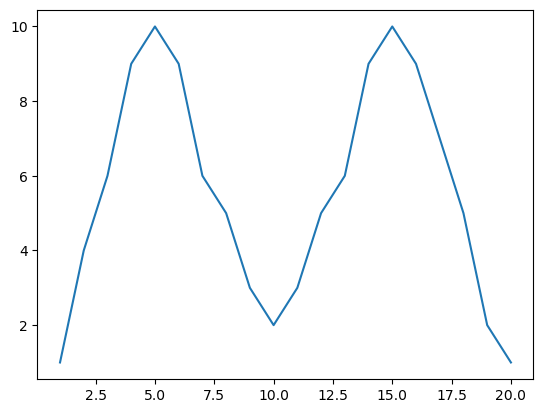

In [2]:
def f(x):
    func1 = 3*np.sin((np.pi*(x))/10)
    return np.real(func1**2) +1

x = np.linspace(1, 20, 20)
occ = f(x)
occ = np.floor(occ)

# add a path
occ[7] += 1
occ[8] += 2
occ[9] += 1
occ[10] += 2
occ[11] += 1
for i in range(16,19):
    occ[i] +=1
plt.plot(x, occ)
print(np.sum(occ))

np.save(f'{workdir}/1CM_20states.npy', occ)

# 2 or more?

In [23]:
np.random.seed(915)
n_samples = 2000

gaussian1 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([20, 20])
gaussian2 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([-20, -20])
gaussian3 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([20,-20])
gaussian4 = np.random.normal(0, 5, size=(n_samples, 2)) + np.array([-20,20])

C = np.array([[0.0, 1.5], [10.5, 0.0]])
gaussian5 = np.dot(np.random.normal(0,1, size=(50, 2)), C) + np.array([0,20])
C2 = np.array([[0.0, 10.5], [1.5, 0.]])
gaussian6 = np.dot(np.random.normal(0,1, size=(50, 2)), C2) + np.array([-20,0])

x = np.vstack([gaussian1, gaussian2, gaussian3, gaussian4, gaussian5, gaussian6])
x = rescale(x)

/home/danlin/eman2-sphire-sparx/envs/ManifoldEM/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  


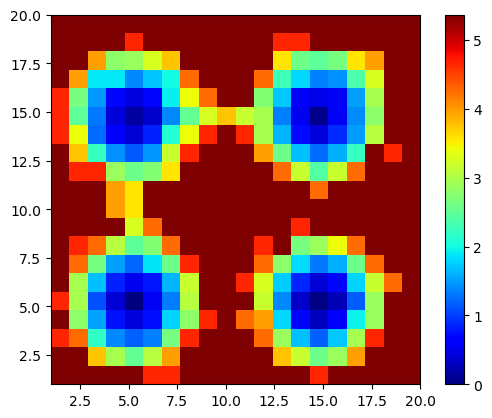

In [24]:
eng = free_energy(20, x)
plt.imshow(eng, extent=[1,20,1,20], origin='lower', cmap='jet')
plt.colorbar()

/home/danlin/eman2-sphire-sparx/envs/ManifoldEM/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  


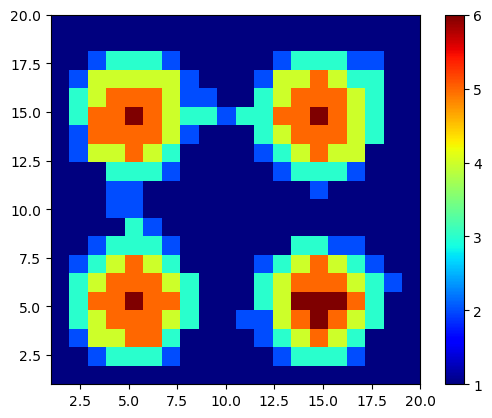

In [25]:
eng = free_energy(20, x)
occ = -eng + np.max(eng)
#occ = rescale(occ, a=1, b=9)
occ = np.floor(occ) +1
plt.imshow(occ, extent=[1,20,1,20], origin='lower', cmap='jet')
plt.colorbar()

In [22]:
print(np.sum(occ))  
np.save(f'{workdir}/2CM_20states.npy', occ)

881.0


In [51]:
n_samples = 1000
gaussian1 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([20,20,20])
gaussian2 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([-20,-20,-20])
gaussian3 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([-20,20,20])
gaussian4 = np.random.normal(0, 5, size=(n_samples, 3)) + np.array([20,-20,-20])

x = np.vstack([gaussian1, gaussian2, gaussian3, gaussian4])
x = rescale(x)

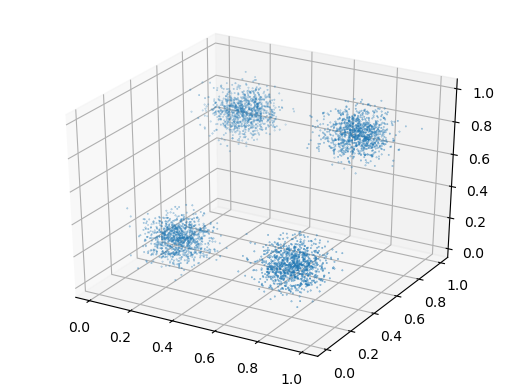

In [52]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], s=0.1)